Accipiter albogularis
Accipiter badius
Accipiter bicolor
Accipiter brachyurus
Accipiter brevipes
Accipiter butleri
Accipiter castanilius
Accipiter cirrocephalus
               SpeciesName NumReferences NumParagraphs NumWords Error
0    Accipiter albogularis             2             4      359   NaN
1         Accipiter badius            35            12     6188   NaN
2        Accipiter bicolor            17            11     5405   NaN
3     Accipiter brachyurus             3             5     1646   NaN
4       Accipiter brevipes            14            15     4300   NaN
5        Accipiter butleri             3             5      660   NaN
6    Accipiter castanilius             5             7     1852   NaN
7  Accipiter cirrocephalus             7             7     3558   NaN
               SpeciesName NumReferences NumParagraphs NumWords Error  Cluster
0    Accipiter albogularis             2             4      359   NaN        1
1         Accipiter badius            35           

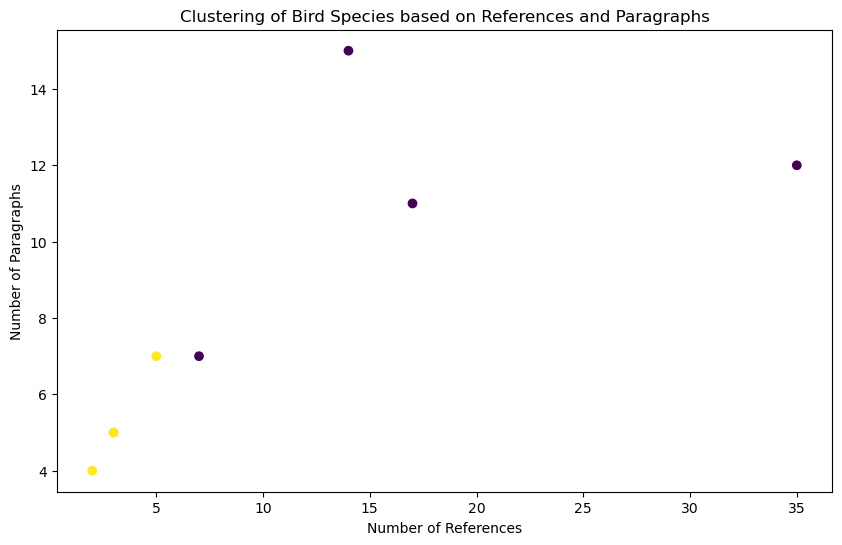

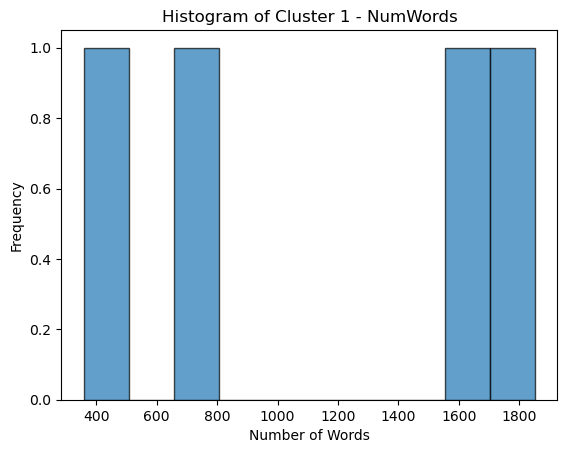

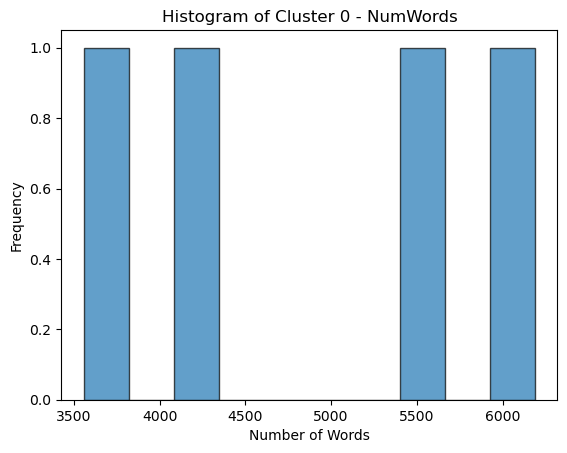

end


In [15]:
import requests as rq
from bs4 import BeautifulSoup as bs
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


df = pd.DataFrame(columns=["SpeciesName", "NumReferences", "NumParagraphs", "NumWords", "Error"])


#methods
#total number of paragraphs in page + total number of words in page 
def total_Para(soup): 
    paragraph = soup.find_all("p")
    #for every element in paragraph 
    totalParagraph = len(paragraph)
    #print("Total number of paragraphgs: " + str(totalParagraph))
    return totalParagraph
    
def total_Words(soup):
    totalWords = 0
    paragraph = soup.find_all("p")
    for i in range(len(paragraph)):
        totalWords = totalWords + len(paragraph[i].get_text())
   # print("Total number of words: " + str(totalWords))
    return totalWords
    
#total number of references 
def total_Ref(soup): 
    references_section = soup.find('ol', class_= 'references')

    if references_section:
        references = references_section.find_all('li')
        num_references = len(references)
       # print(f"Number of references: {num_references}")
        return num_references
    else:
        #print("No references found.")    
        return 0
#end of methods

birdSpecies = ["Accipiter albogularis", "Accipiter badius", "Accipiter bicolor", "Accipiter brachyurus", "Accipiter brevipes", "Accipiter butleri", "Accipiter castanilius", "Accipiter cirrocephalus"]

for x in birdSpecies: 
    species = x
    print(species)
    #species = "Accipiter badius"
    wikipedia_base = "https://en.wikipedia.org/wiki/"
    article = wikipedia_base + species
    html_doc = rq.get(article).text

    soup = bs(html_doc, 'html.parser')
    
    a = total_Para(soup)
    b = total_Words(soup)
    c = total_Ref(soup)
    
    new_row = pd.DataFrame({"SpeciesName": [species], "NumReferences": [c], "NumParagraphs": [a], "NumWords": [b]})
 
    df = pd.concat([df, new_row], ignore_index=True)
    
print(df)

#clustering
features = df[["NumReferences", "NumParagraphs", "NumWords"]]  #columns used for clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(features)  #kmeans clustering
df['Cluster'] = kmeans.labels_    #creates new cluster column in df 

print(df)



print("\n \n \n") 

plt.figure(figsize=(10, 6))
plt.scatter(df['NumReferences'], df['NumParagraphs'], c=df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Number of References')
plt.ylabel('Number of Paragraphs')
plt.title('Clustering of Bird Species based on References and Paragraphs')
plt.show()

for cluster_num in df['Cluster'].unique():
    plt.hist(df[df['Cluster'] == cluster_num]['NumWords'], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of Cluster {cluster_num} - NumWords')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.show()
    
    
print("end")


In [7]:
#print(soup.prettify())

species = "Dicaeum eximium"
wikipedia_base = "https://en.wikipedia.org/wiki/"
article = wikipedia_base + species
html_doc = rq.get(article).text

soup = bs(html_doc, 'html.parser')

print(total_Para(soup))
print(total_Words(soup))
print(total_Ref(soup))


5
287
1


In [3]:
print(soup.title.string) 
print(soup.find("h2", {"id": "References"})) #if it doesn't find anything, it will return none. If it does find it, it will return tag (h2) and the text 
#h2Ref = (soup.find_all("h2"))
#print(h2Ref)
#type(h2Ref)
#h2Ref.tag[id]

#looks to see if there is an h2 with the id references. If there is, do [X], and if not, do [Y]. 
#swap out whatever criteria Sandra deems sufficient evidence 
#refences is more guaranteed to exist as a header
#extract number of words in the wikipedia page, ... is that sufficient evidence??
#list of all species 
#construct a list of boolean values 
#if eveidcene exist, 
# Bird1 - True
# Bird2- False 
#Bird3 - True 

#use pandas to create a data frame 
#combining those 2 lists to create a rectangular dataset and create a csv 
# 2 variables: name, boolean value (T or F)

Shikra - Wikipedia
<h2 id="References">References</h2>


In [4]:
#everyhting we have dones so far assume wikipedia entries ... what if it does not exist
#find a weak speceis and look to see what returns 
#unique identify of no article exists 
# then put a false 
#What to do if species dne on wikipedia 

#assuming we successfully connected to wikipedia and there is no server error 

# number 1 thing to do is verfiy there is no server error!! 
# request library that talks to the server allows to figure out what type of error 
# server number is 200: which means it works 
#anything else is invalid 
# a list of server response codes 
#request if response code is 200 
#look into species 
#if response code is not 200, record a false in the boolean list 

#do a few for a test 
#what are limits to scraping wikipedia ... look up on google 
#what is the number per second, per day, per week...


In [5]:
#looking for number of words 

def total_WordsPara(): 
    paragraph = soup.find_all("p")
    #for every element in paragraph 
    totalParagraph = len(paragraph)
    print(totalParagraph)
    totalWords = 0
    
    paragraph = soup.find_all("p")
    for i in range(len(paragraph)):
        totalWords = totalWords + len(paragraph[i].get_text())
    
    print(totalWords)

12
6188


In [6]:
#this cell finds how many references there are in the wiki page per species 
references_section = soup.find('ol', class_= 'references')

if references_section:
    references = references_section.find_all('li')
    num_references = len(references)
    print(f"Number of references: {num_references}")
else:
    print("No references found.")

Number of references: 35


In [11]:
import pandas as pd

df = pd.DataFrame(columns=["SpeciesName", "NumReferences", "NumParagraphs", "NumWords", "Error"])



birdSpecies = ["Accipiter albogularis", "Accipiter badius", "Accipiter bicolor"]

    
for i in birdSpecies:
    # Create a DataFrame for the new row
    new_row = pd.DataFrame({"SpeciesName": [i], "NumReferences": [num_references], "NumParagraphs": [totalParagraph], "NumWords": [totalWords]})
    
    # Append the new row to the existing DataFrame
    df = pd.concat([df, new_row], ignore_index=True)

# Display the DataFrame
print(df)

['Accipiter albogularis', 'Accipiter badius', 'Accipiter bicolor']
Accipiter albogularis
Accipiter badius
Accipiter bicolor
             SpeciesName NumReferences NumParagraphs NumWords Error
0  Accipiter albogularis            35            12     6188   NaN
1       Accipiter badius            35            12     6188   NaN
2      Accipiter bicolor            35            12     6188   NaN


**Note**

You will need to install openpyxl if not already installed

```{Python}
pip install openpyxl
```

If you need to figure out your working directory

```{Python}
import os
print(os.getcwd())
```

Read in data from Excel. This might take a minute to two to complete.

In [14]:
import pandas as pd

path = "../data/Chapter_2_PhD_data_final.xlsx"
sheet = "Core Land birds"
df = pd.read_excel(path, sheet_name = sheet)
print(df.head())

#kmeans in R to cluster 
#put it in a historgram to visualize the cluster
#add an error column that will have a boolean value so we can go back to it for errors

                Species1       Family1           Order1  Wing.Length    Mass  \
0  Accipiter albogularis  Accipitridae  Accipitriformes        235.2  248.75   
1       Accipiter badius  Accipitridae  Accipitriformes        186.7  131.15   
2      Accipiter bicolor  Accipitridae  Accipitriformes        229.6  287.54   
3   Accipiter brachyurus  Accipitridae  Accipitriformes        202.2  142.00   
4     Accipiter brevipes  Accipitridae  Accipitriformes        217.6  186.48   

     Habitat  Habitat.Density  Migration Trophic.Level Trophic.Niche  \
0     Forest                1        2.0     Carnivore     Vertivore   
1  Shrubland                2        3.0     Carnivore     Vertivore   
2   Woodland                2        2.0     Carnivore     Vertivore   
3     Forest                1        2.0     Carnivore     Vertivore   
4     Forest                1        3.0     Carnivore     Vertivore   

  Primary.Lifestyle  Wing area  Source wing area  Wingload (kg/m2)  \
0       Insessor